##### Simple Linear Regression
Simple Linear Regression is a linear regression model with a single independent variable that allows us to summarize and study relationships between two continuous (quantitative) variables
One variable, denoted $x$, is regarded as the independent or feature variable. The other variable, denoted $y$, is regarded as the dependent or target variable.
  
  $$
  y=\alpha +\beta x,
  $$

As a (simulate) example, It is assumed that the two variables are linear related. Hence, we try to find a linear function that predicts the target values and the line of best fit - the regression line from error would be minimal. We are trying to minimize the lenght between the observed(training-$y_i$) value and the predicted(testing-$y_p$) values from our model.

  $$
  min\{SUM(y_i - y_p)^2\}
  $$
  
In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours the studied.
  
  $$
  Score=\alpha +\beta * hours
  $$
  
  > where<br/>
  > $\alpha$ is y intercept<br/>
  > $\beta$ is slop

##### Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

##### Import Data

In [2]:
dataset = pd.read_csv('day_004_student_scores.csv')
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values

In [3]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Plot Data

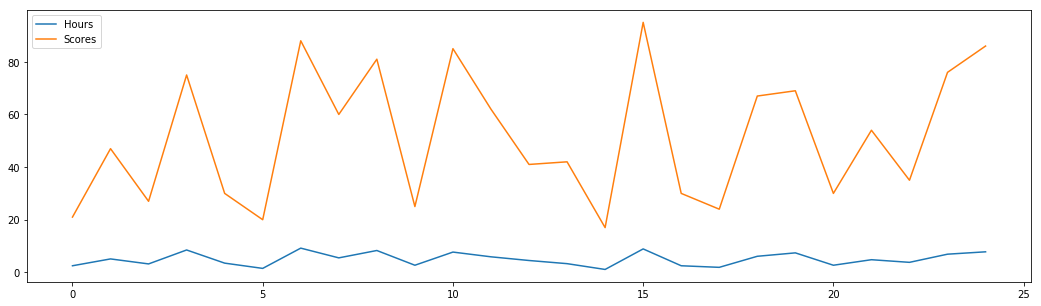

In [4]:
dataset.plot(figsize=(18,5))

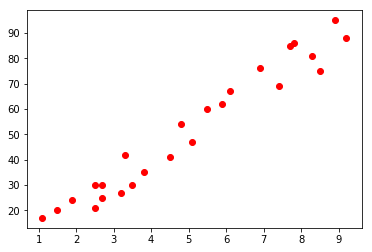

In [5]:
plt.scatter(X , Y, color = 'red')

##### Check for missing data

In [6]:
dataset.isnull().values.any()

False

##### Split Data

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Fitting Simple Linear Regression Model to the training set

.fit() -> fits a linear model<br/>
.predict() -> Predict Y using the linear model with estimated coefficients<br/>
.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model<br/>
.coef_ -> gives the coefficients<br/>
.intercept_ -> gives the estimated intercepts<br/>

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [9]:
regressor.intercept_ 

1.932204253151646

In [10]:
regressor.coef_

array([9.94167834])

  we got
  
  $$
  Score=1.932204253151646 + 9.94167834hours
  $$

##### Predecting the Result

In [11]:
Y_pred = regressor.predict(X_test)

##### Visualising the Training results

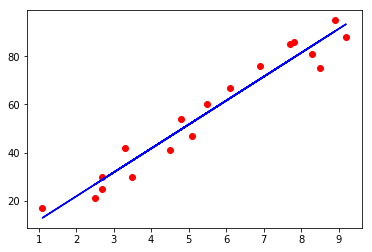

In [12]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

##### Visualizing the test results

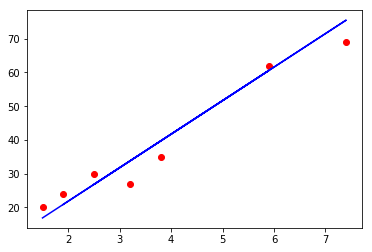

In [13]:
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')

##### Mean Squared Error

In [14]:
mean_squared_error(Y_test, Y_pred)

20.33292367497997

In [15]:
mean_squared_error(Y_test, Y_pred, multioutput='raw_values')

array([20.33292367])

In [16]:
Y_test

array([20, 27, 69, 30, 62, 35, 24])

In [17]:
Y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])